In [3]:
import gc
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

import plotly.express as px

from atel.data import BookCollection

In [4]:
# load data
book_col = BookCollection(data_file='./book_col_271120.pkl')

# Total number of books
print(f'Number of books: {book_col.num_books}')

Loaded from disk: ./book_col_271120.pkl
Number of books: 803


In [5]:
data = []

for i, book in enumerate(book_col):
    if book.code_dict is None:
        print(f'Book with index {i} is None')
        continue
    book.code_dict['book_id'] = i 
    data.append(book.code_dict)

Book with index 509 is None


In [53]:
book_df = pd.DataFrame(data)

In [54]:
list_cols = [
    'Genre', 'Attitude', 'Stavning', 'Perspektiv', 'Tekstbånd', 'Fremstillingsform', 
    'Semantisk univers', 'Stemmer', 'Forbindere', 'Interjektioner'
]

In [55]:
## Replace empty strings with NaN values
book_df = book_df.replace('', np.NaN)

## Explode all columns
# Exploded books
ex_book_df = book_df.copy(deep=True)
for col in list_cols:
    ex_book_df = ex_book_df.explode(col)

del book_df
gc.collect()

488

In [56]:
ex_book_df.head()

,Genre,Attitude,Stavning,Perspektiv,Tekstbånd,Fremstillingsform,Semantisk univers,Holistisk vurdering,Stemmer,book_id,Forbindere,Interjektioner,Metaforbrug,Noter
0,Selvportræt,Bedømmelse positiv,Semifonetisk,Eksplicit fortæller,NaN,Beskrivende,Mennesker,1,En stemme,0,NaN,NaN,NaN,NaN
1,Rim og remser,NaN,Fonetisk,Implicit fortæller,Semantisk,Beskrivende,Vilde dyr,1,En stemme,1,NaN,NaN,NaN,NaN
2,NaN,Følelse 1. person,Semifonetisk,Eksplicit fortæller,NaN,Beskrivende,Mig selv,0,En stemme,2,Tilføjelse,NaN,NaN,NaN
3,Hverdagsbeskrivelse,NaN,Semifonetisk,Implicit fortæller,NaN,Beskrivende,Kæledyr,1,En stemme,3,NaN,NaN,NaN,NaN
3,Hverdagsbeskrivelse,NaN,Fonetisk,Implicit fortæller,NaN,Beskrivende,Kæledyr,1,En stemme,3,NaN,NaN,NaN,NaN


In [57]:
ex_book_df[ex_book_df['Semantisk univers'] == 'Vilde dyr\xa0'] = 'Vilde dyr'

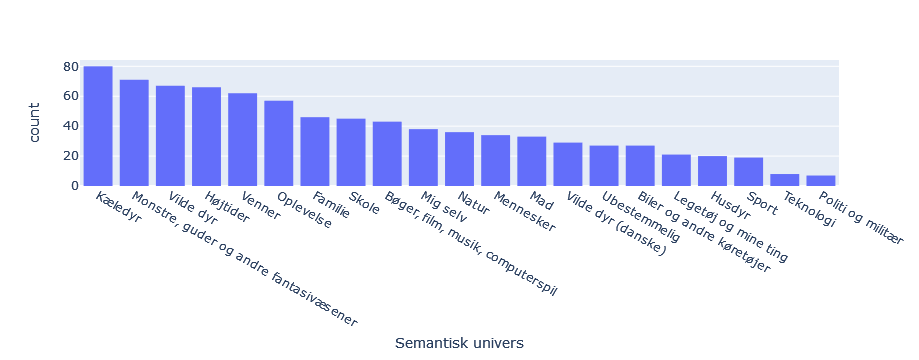

In [66]:

px.histogram(ex_book_df[['book_id', 'Semantisk univers']].drop_duplicates(), x='Semantisk univers')\
  .update_xaxes(categoryorder='total descending')